In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r2/title_r2_2.5k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 2500 drug-target pairs
encoding drug...
unique drugs: 2457
encoding protein...
unique target sequence: 743
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 49.8300. Total time 0.00055 hours
Validation at Epoch 1 with loss:4.33040, MSE: 4.33040 , Pearson Correlation: 0.00659 with p-value: 9.17E-01 , Concordance Index: 0.48869
Training at Epoch 2 iteration 0 with loss 4.69582. Total time 0.00333 hours
Validation at Epoch 2 with loss:4.54454, MSE: 4.54454 , Pearson Correlation: 0.04163 with p-value: 5.12E-01 , Concordance Index: 0.49412
Training at Epoch 3 iteration 0 with loss 5.34643. Total time 0.00611 hours
Validation at Epoch 3 with loss:1.85051, MSE: 1.85051 , Pearson Correlation: 0.06655 with p-value: 2.95E-01 , Concordance Index: 0.50065
Training at Epoch 4 iteration 0 with loss 2.18576. Total time 0.00916 hours
Validation at Epoch 4 with loss:1.88193, MSE: 1.88193 , Pearson Correlation: 0.07150 with p-value: 2.60E-01 , Concordance Index: 0.50448
Training at Epoch 5 iteration 0 with loss 2.58301. Total time 0.01222 hours
Valida

Training at Epoch 39 iteration 0 with loss 1.58372. Total time 0.11888 hours
Validation at Epoch 39 with loss:1.90418, MSE: 1.90418 , Pearson Correlation: 0.24517 with p-value: 8.96E-05 , Concordance Index: 0.57350
Training at Epoch 40 iteration 0 with loss 1.55220. Total time 0.12222 hours
Validation at Epoch 40 with loss:1.76426, MSE: 1.76426 , Pearson Correlation: 0.25915 with p-value: 3.35E-05 , Concordance Index: 0.57890
Training at Epoch 41 iteration 0 with loss 1.28010. Total time 0.12527 hours
Validation at Epoch 41 with loss:1.77419, MSE: 1.77419 , Pearson Correlation: 0.27055 with p-value: 1.44E-05 , Concordance Index: 0.58141
Training at Epoch 42 iteration 0 with loss 1.51422. Total time 0.12861 hours
Validation at Epoch 42 with loss:1.90020, MSE: 1.90020 , Pearson Correlation: 0.28154 with p-value: 6.15E-06 , Concordance Index: 0.58308
Training at Epoch 43 iteration 0 with loss 1.40731. Total time 0.13166 hours
Validation at Epoch 43 with loss:1.89902, MSE: 1.89902 , Pearso

Validation at Epoch 77 with loss:2.17238, MSE: 2.17238 , Pearson Correlation: 0.35504 with p-value: 7.70E-09 , Concordance Index: 0.61137
Training at Epoch 78 iteration 0 with loss 0.24490. Total time 0.23194 hours
Validation at Epoch 78 with loss:2.25885, MSE: 2.25885 , Pearson Correlation: 0.35603 with p-value: 6.95E-09 , Concordance Index: 0.61288
Training at Epoch 79 iteration 0 with loss 0.48542. Total time 0.23472 hours
Validation at Epoch 79 with loss:1.92506, MSE: 1.92506 , Pearson Correlation: 0.35881 with p-value: 5.20E-09 , Concordance Index: 0.61423
Training at Epoch 80 iteration 0 with loss 0.16293. Total time 0.23777 hours
Validation at Epoch 80 with loss:2.06343, MSE: 2.06343 , Pearson Correlation: 0.35199 with p-value: 1.05E-08 , Concordance Index: 0.61162
Training at Epoch 81 iteration 0 with loss 0.15928. Total time 0.24055 hours
Validation at Epoch 81 with loss:2.08597, MSE: 2.08597 , Pearson Correlation: 0.35743 with p-value: 6.01E-09 , Concordance Index: 0.61336
Tr

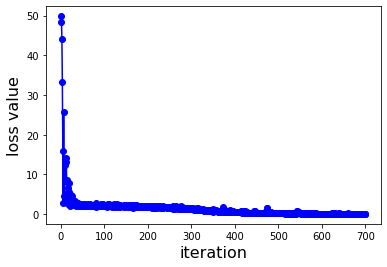

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r2/model_r2_2.5k_100epochs')